In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.4.0'

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.0
2.4.0


In [3]:
# Read in data from home directory
from shutil import unpack_archive
unpack_archive('digit-recognizer.zip', 'C:/users/johna/')

In [4]:
import pandas as pd

# Load files 
Train = pd.read_csv(r'C:/users/johna/train.csv')
X_test = pd.read_csv(r'C:/users/johna/test.csv')
X_test2 = pd.read_csv(r'C:/users/johna/test.csv')

# Print shape and size of data 
print('Shape of Training set', Train.shape)
print('Shape of Training set', X_test.shape)
Train.dtypes

Shape of Training set (42000, 785)
Shape of Training set (28000, 784)


label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

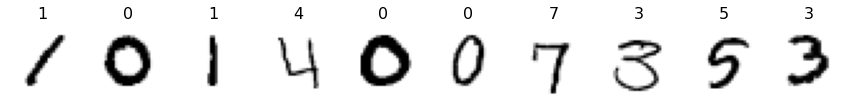

In [5]:
# Visualise the data set
from matplotlib import pyplot as plt
import numpy as np

# Define a function for visualising the first instances in the data 
def visualise_number(df, label, save):
    plot_ten_df = df.drop(label, axis=1).iloc[0:10, :]
    plt.rcParams['figure.figsize'] = [15, 15]
    for index in range(10):
        plt.subplot(1, 10, index+1)
        # reshape pixel arragement to 28 x 28
        digit_array = np.asarray(plot_ten_df.iloc[index]).reshape(28, 28)
        plt.imshow(digit_array, cmap="binary")
        plt.title(df[label].iloc[index], fontsize=16)
        plt.axis("off")
        plt.savefig(save)

label = 'label'
visualise_number(Train, label, "Train_data_NMIST")





In [6]:
# Data already flattened so just separate labels from features
X_train_full = Train.drop(columns=['label'])
y_train_full = Train['label']

In [7]:
# We will create a validation set form the training data 
X_valid, X_train = X_train_full[:4200] / 255.0, X_train_full[4200:] / 255.0  # divide by 255.0 scales pixel intensity in the range 0-1 and converts them into floats
y_valid, y_train = y_train_full[:4200], y_train_full[4200:]
X_test = X_test / 255.0
X_test2 = X_test2 / 255.0

In [8]:
# Build sequential neural network

model = keras.models.Sequential()  # Keras sequential model is composed of a single stack of layers connected sequentially
model.add(keras.layers.Input(shape=(784)))  # Input layer is a 1D array (no parameters, first layer so specify input shape, not including batch size just size of instances)
model.add(keras.layers.Dense(300, activation="relu"))  # Dense hidden layer with 300 neurons and ReLU activation fucntiomn ( each dense layer manages it's own weight matrix and bias vector)
model.add(keras.layers.Dense(100, activation="relu"))  # Second Dense hidden layer of 100 neurons
model.add(keras.layers.Dense(10, activation="softmax"))  # Final layer is a dense output layer of 10 neurons with softmax activation function (there are 10 exxclusive classes)

# Displays all the model's layers 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Build a neural network with deep and wide architecture

input_ = keras.layers.Input(shape=(784))  # Input layer 
hidden1 = keras.layers.Dense(300, activation="relu")(input_)  # Create first hidden layer and feed input layer to it
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)  # Create 2nd hidden layer and feed output of first hidden layer 
concat = keras.layers.Concatenate()([input_, hidden2])  # Concatenate output from 2nd hidden layer and input layer
output = keras.layers.Dense(10, activation="softmax")(concat)  # Feed concatenation of first and second input layer to output layer creating wide and deep network
model2 = keras.Model(inputs=[input_], outputs=[output])

# Display model architecture 
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 300)          235500      input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 100)          30100       dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 884)          0           input_2[0][0]                    
                                                                 dense_4[0][0]                

In [10]:
# Compile the model 1: sequential NN

model.compile(loss="sparse_categorical_crossentropy",  # We have sparse labels: each instance there is a target class from 0 to 9 and classes are exclusive
             optimizer="sgd",  # model trained useing stochastic gradient descent 
             metrics=["accuracy"])  

In [11]:
# Compile model 2: Wide and deep NN

model2.compile(loss="sparse_categorical_crossentropy",  # We have sparse labels: each instance there is a target class from 0 to 9 and classes are exclusive
             optimizer="sgd",  # model trained useing stochastic gradient descent 
             metrics=["accuracy"])  

Epoch 1/30
1182/1182 [==============================] - 2s 2ms/step - loss: 1.1883 - accuracy: 0.6933 - val_loss: 0.3638 - val_accuracy: 0.8971
Epoch 2/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.3365 - accuracy: 0.9035 - val_loss: 0.2849 - val_accuracy: 0.9188
Epoch 3/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.9208 - val_loss: 0.2498 - val_accuracy: 0.9288
Epoch 4/30
1182/1182 [==============================] - 2s 1ms/step - loss: 0.2307 - accuracy: 0.9343 - val_loss: 0.2188 - val_accuracy: 0.9402
Epoch 5/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.2043 - accuracy: 0.9418 - val_loss: 0.2055 - val_accuracy: 0.9414
Epoch 6/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.1791 - accuracy: 0.9499 - val_loss: 0.1850 - val_accuracy: 0.9460
Epoch 7/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.1639 - accuracy: 0.9537 - val_loss: 0.1725 - val_accuracy:

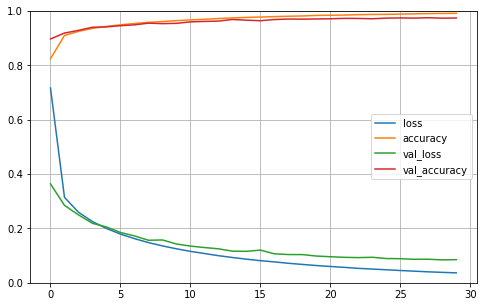

<Figure size 1080x1080 with 0 Axes>

In [12]:
# Fit  model1 : sequential NN
history = model.fit(X_train, y_train, epochs=30,  # Set the number of epochs else Keras defaults to 1 epoch
                   validation_data=(X_valid, y_valid))  # Passing the validation sets enables Keras to measure the loss and accuracy metrics on the validation set

# Plot the training history for the network
def plot_performance (history, save):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  # Sets the verticle axis range from 0 to 1
    plt.show()
    plt.savefig(save)
    
plot_performance (history, 'model1')

Epoch 1/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.2351 - accuracy: 0.6874 - val_loss: 0.4985 - val_accuracy: 0.8810
Epoch 2/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.4572 - accuracy: 0.8812 - val_loss: 0.3821 - val_accuracy: 0.8981
Epoch 3/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.3639 - accuracy: 0.8990 - val_loss: 0.3358 - val_accuracy: 0.9052
Epoch 4/30
1182/1182 [==============================] - 2s 1ms/step - loss: 0.3194 - accuracy: 0.9088 - val_loss: 0.3026 - val_accuracy: 0.9124
Epoch 5/30
1182/1182 [==============================] - 2s 1ms/step - loss: 0.2887 - accuracy: 0.9183 - val_loss: 0.2763 - val_accuracy: 0.9240
Epoch 6/30
1182/1182 [==============================] - 1s 1ms/step - loss: 0.2603 - accuracy: 0.9259 - val_loss: 0.2555 - val_accuracy: 0.9288
Epoch 7/30
1182/1182 [==============================] - 2s 1ms/step - loss: 0.2416 - accuracy: 0.9311 - val_loss: 0.2401 - val_accuracy:

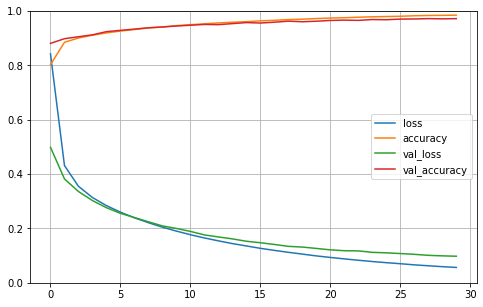

<Figure size 1080x1080 with 0 Axes>

In [13]:
# Fit model 2, wide and deep NN

history = model2.fit(X_train, y_train, epochs=30,  # Set the number of epochs else Keras defaults to 1 epoch
                   validation_data=(X_valid, y_valid))  # Passing the validation sets enables Keras to measure the loss and accuracy metrics on the validation set

plot_performance (history, 'model2')

In [14]:
# We will use the model to make predictions on new instances 
import numpy as np


print('Shape of Test set', X_test.shape)

X_test['label1'] = np.argmax(model2.predict(X_test), axis=1)  # Use model to predict/infer what these instances are
X_test2['label2']  = np.argmax(model2.predict(X_test2), axis=1)  # Use model to predict/infer what these instances are




Shape of Test set (28000, 784)


Model_1


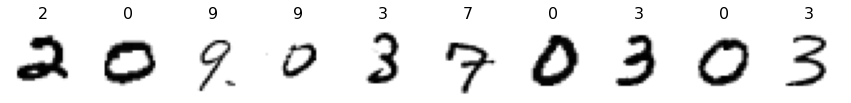

In [15]:
print('Model_1')
label = 'label1'
visualise_number(X_test, label, "Model1_NMIST")

Model_2


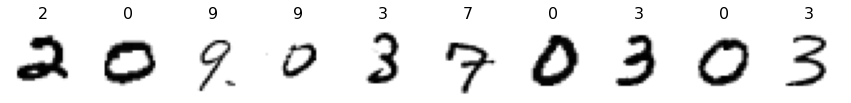

In [16]:
print('Model_2')
label = 'label2'
visualise_number(X_test2, label, "Model2_NMIST")

In [17]:
X_test.to_csv(index=False,path_or_buf=r'C:\Users\johna\OneDrive\Documents\Kaggle Competitions\Advanced Regression Sale Price Prediction\MNIST2.csv')